# Oxford Data Connector

This file contains the base to connect to the Oxford database and drops the data into a dataframe df. 

## Training

In [2]:
import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta

### Copy the data locally

In [3]:
# Main source for the training data
DATA_URL = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
# Local file
DATA_FILE = 'data/OxCGRT_latest.csv'
#Demographics File
DEMOGRAPHICS_FILE = 'data/Country_Demographics.csv'
DEMOGRAPHICS_BRZ_R_FILE = 'data/brz_region_demo.csv'

In [4]:
#Import data from the Oxford Website
import os
import urllib.request
if not os.path.exists('data'):
    os.mkdir('data')
urllib.request.urlretrieve(DATA_URL, DATA_FILE)

('data/OxCGRT_latest.csv', <http.client.HTTPMessage at 0x7fddcf64aeb0>)

In [5]:
# Load historical data from local file
df = pd.read_csv(DATA_FILE, 
                 parse_dates=['Date'],
                 encoding="ISO-8859-1",
                 dtype={"RegionName": str,
                        "RegionCode": str},
                 error_bad_lines=False)

#Data from Worldometers - https://www.worldometers.info/world-population/population-by-country/
demographics = pd.read_csv(DEMOGRAPHICS_FILE,
                 sep = ';',
                 encoding="ISO-8859-1",
                 dtype={"Country": str,
                        "Population": int},
                 error_bad_lines=False)

In [6]:
#variable to iterate on top for each country
country = ("Aruba,Afghanistan,Angola,Albania,Andorra,\
                United Arab Emirates,Argentina,Australia,Austria,\
                Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,\
                Bulgaria,Bahrain,Bahamas,Bosnia and Herzegovina,Belarus,\
                Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei,Bhutan,\
                Botswana,Central African Republic,Canada,Switzerland,\
                Chile,China,Cote d'Ivoire,Cameroon,Democratic Republic of Congo,\
                Congo,Colombia,Comoros,Cape Verde,Costa Rica,Cuba,Cyprus,Czech Republic,\
                Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,Ecuador,Egypt,\
                Eritrea,Spain,Estonia,Ethiopia,Finland,Fiji,France,Faeroe Islands,\
                Gabon,United Kingdom,Georgia,Ghana,Guinea,Gambia,Greece,Greenland,\
                Guatemala,Guam,Guyana,Hong Kong,Honduras,Croatia,Haiti,Hungary,Indonesia,\
                India,Ireland,Iran,Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,\
                Kenya,Kyrgyz Republic,Cambodia,South Korea,Kuwait,Laos,Lebanon,Liberia,Libya,\
                Sri Lanka,Lesotho,Lithuania,Luxembourg,Latvia,Macao,Morocco,Monaco,Moldova,\
                Madagascar,Mexico,Mali,Malta,Myanmar,Mongolia,Mozambique,Mauritania,Mauritius,\
                Malawi,Malaysia,Namibia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,New Zealand,\
                Oman,Pakistan,Panama,Peru,Philippines,Papua New Guinea,Poland,Puerto Rico,Portugal,\
                Paraguay,Palestine,Qatar,Kosovo,Romania,Russia,Rwanda,Saudi Arabia,Sudan,Senegal,\
                Singapore,Solomon Islands,Sierra Leone,El Salvador,San Marino,Somalia,Serbia,\
                South Sudan,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Seychelles,Syria,\
                Chad,Togo,Thailand,Tajikistan,Turkmenistan,Timor-Leste,Tonga,Trinidad and Tobago,\
                Tunisia,Turkey,Taiwan,Tanzania,Uganda,Ukraine,Uruguay,United States,Uzbekistan,\
                Venezuela,United States Virgin Islands,Vietnam,Vanuatu,Yemen,South Africa,Zambia,Zimbabwe")

print(country)

Aruba,Afghanistan,Angola,Albania,Andorra,                United Arab Emirates,Argentina,Australia,Austria,                Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,                Bulgaria,Bahrain,Bahamas,Bosnia and Herzegovina,Belarus,                Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei,Bhutan,                Botswana,Central African Republic,Canada,Switzerland,                Chile,China,Cote d'Ivoire,Cameroon,Democratic Republic of Congo,                Congo,Colombia,Comoros,Cape Verde,Costa Rica,Cuba,Cyprus,Czech Republic,                Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,Ecuador,Egypt,                Eritrea,Spain,Estonia,Ethiopia,Finland,Fiji,France,Faeroe Islands,                Gabon,United Kingdom,Georgia,Ghana,Guinea,Gambia,Greece,Greenland,                Guatemala,Guam,Guyana,Hong Kong,Honduras,Croatia,Haiti,Hungary,Indonesia,                India,Ireland,Iran,Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,      

In [7]:
display(df.set_index('CountryName').filter(like='Italy',axis=0))

,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
CountryName,,,,,,,,,,,,,,,,,,,,,
Italy,ITA,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
Italy,ITA,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
Italy,ITA,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
Italy,ITA,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
Italy,ITA,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Italy,ITA,NaN,NaN,NAT_TOTAL,2020-12-24,NaN,NaN,NaN,NaN,NaN,...,NaN,79.63,NaN,80.95,NaN,70.56,NaN,69.87,NaN,75.0
Italy,ITA,NaN,NaN,NAT_TOTAL,2020-12-25,NaN,NaN,NaN,NaN,NaN,...,NaN,79.63,NaN,80.95,NaN,70.56,NaN,69.87,NaN,75.0
Italy,ITA,NaN,NaN,NAT_TOTAL,2020-12-26,NaN,NaN,NaN,NaN,NaN,...,NaN,79.63,NaN,80.95,NaN,70.56,NaN,69.87,NaN,75.0


In [8]:
#DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)[source]
test = demographics.join(df.set_index('CountryName'),on='Country',how='inner',lsuffix='Country',rsuffix='CountryName')
display(test.drop_duplicates())

,Country,Population,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,China,1439323776,CHN,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,6.39,6.39,7.37,7.37,0.0,0.0
0,China,1439323776,CHN,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,6.39,6.39,7.37,7.37,0.0,0.0
0,China,1439323776,CHN,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,6.39,6.39,7.37,7.37,0.0,0.0
0,China,1439323776,CHN,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,6.39,6.39,7.37,7.37,0.0,0.0
0,China,1439323776,CHN,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,0.0,...,2.78,2.78,4.76,4.76,11.39,11.39,13.14,13.14,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,San Marino,33931,SMR,NaN,NaN,NAT_TOTAL,2020-12-24,NaN,NaN,NaN,...,NaN,51.85,NaN,64.29,NaN,59.44,NaN,57.05,NaN,75.0
217,San Marino,33931,SMR,NaN,NaN,NAT_TOTAL,2020-12-25,NaN,NaN,NaN,...,NaN,51.85,NaN,64.29,NaN,59.44,NaN,57.05,NaN,75.0
217,San Marino,33931,SMR,NaN,NaN,NAT_TOTAL,2020-12-26,NaN,NaN,NaN,...,NaN,51.85,NaN,64.29,NaN,59.44,NaN,57.05,NaN,75.0
217,San Marino,33931,SMR,NaN,NaN,NAT_TOTAL,2020-12-27,NaN,NaN,NaN,...,NaN,51.85,NaN,64.29,NaN,59.44,NaN,57.05,NaN,75.0


Listing the number of cases

In [9]:
CASES_COLUMNS = ["Country", "Population", "RegionName", "Date", "ConfirmedCases", "ConfirmedDeaths"]

In [10]:
data = test[CASES_COLUMNS]

In [11]:
display(data)

,Country,Population,RegionName,Date,ConfirmedCases,ConfirmedDeaths
0,China,1439323776,NaN,2020-01-01,NaN,NaN
0,China,1439323776,NaN,2020-01-02,NaN,NaN
0,China,1439323776,NaN,2020-01-03,NaN,NaN
0,China,1439323776,NaN,2020-01-04,NaN,NaN
0,China,1439323776,NaN,2020-01-05,NaN,NaN
...,...,...,...,...,...,...
217,San Marino,33931,NaN,2020-12-24,2231.0,56.0
217,San Marino,33931,NaN,2020-12-25,2231.0,56.0
217,San Marino,33931,NaN,2020-12-26,2231.0,56.0
217,San Marino,33931,NaN,2020-12-27,2231.0,56.0


In [12]:
italy_data = data.query('Country == "Italy" \
                         & ConfirmedCases!=""\
                         & ConfirmedCases!="0"')

In [13]:
italy_data = italy_data[CASES_COLUMNS]
display(italy_data)

,Country,Population,RegionName,Date,ConfirmedCases,ConfirmedDeaths
22,Italy,60461826,NaN,2020-01-01,NaN,NaN
22,Italy,60461826,NaN,2020-01-02,NaN,NaN
22,Italy,60461826,NaN,2020-01-03,NaN,NaN
22,Italy,60461826,NaN,2020-01-04,NaN,NaN
22,Italy,60461826,NaN,2020-01-05,NaN,NaN
...,...,...,...,...,...,...
22,Italy,60461826,NaN,2020-12-24,2009317.0,70900.0
22,Italy,60461826,NaN,2020-12-25,2028354.0,71359.0
22,Italy,60461826,NaN,2020-12-26,2038759.0,71620.0
22,Italy,60461826,NaN,2020-12-27,2047696.0,71925.0


### s = S/N , i = I/N, r = R/N

### s+i+r = 1 

### I+R = ConfirmedCases + ConfirmedDeaths




In [14]:
susceptible_list = italy_data['Population']-italy_data['ConfirmedCases']
display(susceptible_list)

22           NaN
22           NaN
22           NaN
22           NaN
22           NaN
         ...    
22    58452509.0
22    58433472.0
22    58423067.0
22    58414130.0
22           NaN
Length: 354, dtype: float64

In [15]:
italy_data.loc[:,'Susceptible'] = pd.Series(susceptible_list, index=italy_data.index)
display(italy_data)

,Country,Population,RegionName,Date,ConfirmedCases,ConfirmedDeaths,Susceptible
22,Italy,60461826,NaN,2020-01-01,NaN,NaN,NaN
22,Italy,60461826,NaN,2020-01-02,NaN,NaN,NaN
22,Italy,60461826,NaN,2020-01-03,NaN,NaN,NaN
22,Italy,60461826,NaN,2020-01-04,NaN,NaN,NaN
22,Italy,60461826,NaN,2020-01-05,NaN,NaN,NaN
...,...,...,...,...,...,...,...
22,Italy,60461826,NaN,2020-12-24,2009317.0,70900.0,58452509.0
22,Italy,60461826,NaN,2020-12-25,2028354.0,71359.0,58433472.0
22,Italy,60461826,NaN,2020-12-26,2038759.0,71620.0,58423067.0
22,Italy,60461826,NaN,2020-12-27,2047696.0,71925.0,58414130.0


In [16]:
susceptible_percentage = italy_data['Susceptible']/italy_data['Population']
italy_data.loc[:,'s'] = pd.Series(susceptible_percentage, index=italy_data.index)

In [17]:
new_infected_list = italy_data['ConfirmedCases'].diff()
display(new_infected_list)

22        NaN
22        NaN
22        NaN
22        NaN
22        NaN
       ...   
22    18039.0
22    19037.0
22    10405.0
22     8937.0
22        NaN
Name: ConfirmedCases, Length: 354, dtype: float64

In [18]:
italy_data.loc[:,'NewInfected'] = pd.Series(new_infected_list, index=italy_data.index)
display(italy_data)

,Country,Population,RegionName,Date,ConfirmedCases,ConfirmedDeaths,Susceptible,s,NewInfected
22,Italy,60461826,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN
22,Italy,60461826,NaN,2020-01-02,NaN,NaN,NaN,NaN,NaN
22,Italy,60461826,NaN,2020-01-03,NaN,NaN,NaN,NaN,NaN
22,Italy,60461826,NaN,2020-01-04,NaN,NaN,NaN,NaN,NaN
22,Italy,60461826,NaN,2020-01-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22,Italy,60461826,NaN,2020-12-24,2009317.0,70900.0,58452509.0,0.966767,18039.0
22,Italy,60461826,NaN,2020-12-25,2028354.0,71359.0,58433472.0,0.966452,19037.0
22,Italy,60461826,NaN,2020-12-26,2038759.0,71620.0,58423067.0,0.966280,10405.0
22,Italy,60461826,NaN,2020-12-27,2047696.0,71925.0,58414130.0,0.966132,8937.0


In [19]:
infected_percentage = italy_data['ConfirmedCases']/italy_data['Population']
italy_data.loc[:,'i'] = pd.Series(infected_percentage, index=italy_data.index)

In [20]:
italy_data = italy_data.query('Country == "Italy" \
                               & ConfirmedCases!=""\
                               & ConfirmedCases!="0"\
                               & ConfirmedCases!="NaN"')

In [21]:
italy = np.zeros([italy_data.shape[0],2])
italy[0:,0] = np.arange(0,italy_data.shape[0]).astype(int)
italy[0:,1] = italy_data["i"]
print(italy[0:,0])
print(italy[0:,1])


# Main source for the training data
DATA_URL = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
# Local file
DATA_FILE = 'data/OxCGRT_latest.csv'

np.savetxt("data/italy.csv", italy, delimiter=",")

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

## From Here, we have the ParticleFilterSIR

In [22]:
import sys
import os
from traceback import print_exc
from pprint import pprint
from common.utils import read_params, get_data
from common.stats import RSS, MSPE, RMSE
from common.linalg import as_array, as_matrix, init_weights
from common.config import data_type
from time import time
from numpy import cov, tile, std, average, mean, eye, ones, corrcoef, inf
from numpy.random import choice, multivariate_normal, normal, uniform
from numpy import *
from scipy.stats import norm

In [23]:
class ParticleFilter(object):

    def __init__(self, num_part, params={}):
        self.num_part = num_part
        self.weights = init_weights(num_part)

        self.x_prior = None
        
    def step(self, y, predict_P=False, index=1):
        X = self.x_prior
        states = X[:2, :]
        params = X[2:, :]
        
        s_std = std(X[index].A1) 
        
        tmp_ws = as_array([norm.pdf(y, x[0, index], s_std) for x in states.T])
        n_weights = self.weights * tmp_ws
        sum_weights = n_weights.sum()
    
        if sum_weights != 0:
            n_weights /= sum_weights
            neff = 1.0 / (n_weights ** 2).sum() 
        
        if sum_weights == 0 or neff < self.num_part/2.0:
            idx = choice(range(X.shape[1]), X.shape[1], p=self.weights)
            self.weights = tile(as_array(1.0 / self.num_part), self.num_part)
            
            self.x_post = X[:, idx]
        else:
            self.x_post = X
            self.weights = n_weights

        p_mean = average(params, axis=1, weights=self.weights).A1
        p_cov = cov(params, aweights=self.weights)
        self.x_post[2:, :] = multivariate_normal(p_mean, p_cov, X.shape[1]).T
 
        for i, x in enumerate(self.x_post[2:, :].T):
            if x.any() < 0:
                while True:
                    new = multivariate_normal(p_mean, p_cov, 1).T
                    if new.all() > 0 and new[0, 1] > new[0, 2]:
                        self.x_post[2:, i] = new
                        break
        
    def fit(self, x):
        self.x_prior = x 

In [24]:
class BaseSIR(object):
    '''The abstract base for the SIR model and its variant models'''
    def __init__(self, params):
        init_i = float(params.get('init_i', 0.0))
        self.set_init_i(init_i)
        
        self.epoch = 0
        self.epochs = params.get('epochs', params['size'])       #Changed 52 for italy_data.shape[0]
        
        self.fit(params, False)

    def check_bounds(self, x, low_bnd=0, up_bnd=1):
        if x < low_bnd: 
            x = 0.0
        elif x > up_bnd: 
            x = 1.0
        return x

    def fit(self, params, refit=False):
        pass

    def set_init_i(self, i, s=inf):
        self.i = float(i)
        self.s = 1 - i if float(s) is inf else i 
        self.Is = [self.i]
        self.Ss = [self.s]

In [25]:
class SIR(BaseSIR):
    '''The SIR model'''
    def __init__(self, params):
        super(SIR, self).__init__(params)
        self.CDC_obs = get_data(self.CDC)
        
    def fit(self, params, refit=False):
        if not refit:
            self.filter_type = params.get('filter_type', '')
            assert 'beta' in params, 'The parameter beta is missing.'
            self.beta = float(params['beta'])

            assert 'alpha' in params, 'The parameter alpha is missing.'
            self.alpha = float(params['alpha'])

            assert 'CDC' in params, 'The parameter CDC is missing.'
            self.CDC = params['CDC']

            self.filter = None
        if refit:
            self.filter_type = params.get('filter_type', '')
            self.beta = float(params.get('beta', 0)) or self.beta
            self.alpha = float(params.get('alpha', 0)) or self.alpha

            self.CDC = params.get('CDC') or self.CDC

            self.epochs = params.get('epochs', params['size'])         #Changed 52 to italy_data.shape[0]
            self.epoch = params.get('epoch', 0)

        self.init_i = float(params.get('init_i', self.i))
        self.set_init_i(self.init_i)
        self.score = 0.0

        self.filtering = params.get('filtering', False)
        if self.filtering: 
            self._init_filter()

        return self

    def predict(self):
        while self.epoch < self.epochs - 1:
            self.update_states()    
            self.epoch += 1
        self.get_score()

    def update_states(self):
        self.s += self._delta_s()
        self.i += self._delta_i()

        self.s = self.check_bounds(self.s)
        self.i = self.check_bounds(self.i)

        self.Is.append(self.i)
        self.Ss.append(self.s)

    def predict_with_filter(self):
        if not self.filtering or not self.filter:
            raise Exception('The filtering flag must be set True, \
                             and the filter needs to be inialized')

        F = self.filter 
        while self.epoch < self.epochs - 1:
            x = as_matrix([self.s, self.i]).T
            F.fit(x)
            y = as_matrix([self.CDC_obs[self.epoch]]).T
            F.step(y)

            self.s = self.check_bounds(F.x_post[0, 0])
            self.i = self.check_bounds(F.x_post[1, 0])
            self.update_states()
            self.epoch += 1
            
        self.get_score()
        self.score 
                    
    def _delta_s(self):
        return - self.alpha * self.s * self.i 

    def _delta_i(self):
        return self.alpha * self.s * self.i - self.beta * self.i

    def get_score(self):
        self.outcome = [x for _, x in enumerate(self.Is)]
        self.scores = {}
        self.scores['SSE'] = RSS(self.outcome, self.CDC_obs, 1)
        self.scores['RMSE'] = RMSE(self.CDC_obs, self.outcome, 1)
        self.scores['MSPE'] = MSPE(self.CDC_obs, self.outcome, 1)
        self.scores['CORR'] = corrcoef(self.CDC_obs, self.outcome, 1)

    def _init_filter(self):
        num_states = 2
        num_obs = 1
        A = as_matrix([[1, -self.alpha], 
                       [0, 1 + self.alpha - self.beta]])

        B = as_matrix([0, 1])

        Cov = eye(num_states, dtype=data_type) * 0.0001

        V = Cov.copy()
        W = eye(num_obs, dtype=data_type) * 0.0001
        
        self.filter = KalmanFilter(num_states, num_obs, A, B, V, W, Cov)
    
    def construct_B(self, with_param=False):
        B = as_matrix([0, 1, 0, 0]) if with_param else as_matrx([0, 1])

In [26]:
class ParticleSIR(SIR):
    
    def __init__(self, num_enbs, params):
        self.num_enbs = num_enbs
        super(ParticleSIR, self).__init__(params)

        del self.alpha
        del self.beta
        
        self.current_Is = uniform(0, self.i * 2, num_enbs)
        self.current_Ss = ones(num_enbs) - self.current_Is
        self.alphas = uniform(0., 1, num_enbs)
        self.betas = uniform(0., 1, num_enbs)

        self.weights = [init_weights(num_enbs)] # matrix-like

        for i in range(num_enbs):
            if self.alphas[i] < self.betas[i]:
                self.alphas[i], self.betas[i] = self.betas[i], self.alphas[i]  

        self.Is = [self.current_Is.tolist()]
        self.Ss = [self.current_Ss.tolist()]

    def update_states(self):
        for j in range(self.num_enbs):
            s = self.current_Ss[j]
            i = self.current_Is[j]
            s += self._delta_s(self.current_Ss[j], self.current_Is[j], 
                               self.alphas[j])
            i += self._delta_i(self.current_Ss[j], self.current_Is[j], 
                               self.alphas[j], self.betas[j])

            s = self.check_bounds(s)
            i = self.check_bounds(i)

            self.current_Is[j] = i
            self.current_Ss[j] = s

        self.Is.append(self.current_Is.tolist())
        self.Ss.append(self.current_Ss.tolist())

    def _init_filter(self):
        num_states = 4
        num_obs = 1
        
        self.filter = ParticleFilter(self.num_enbs)

    def predict_with_filter(self):
        F = self.filter

        while self.epoch < self.epochs - 1:
            X = as_matrix([self.current_Ss, self.current_Is, 
                           self.alphas, self.betas])
        
            F.fit(X)
            y = self.CDC_obs[self.epoch]
            F.step(y, predict_P=False)
            self.weights.append(F.weights)

            x_post = F.x_post
            for j in range(self.num_enbs):
                self.current_Ss[j] = self.check_bounds(x_post[0, j])
                self.current_Is[j] = self.check_bounds(x_post[1, j])
                self.alphas[j] = self.check_bounds(x_post[2, j], inf)
                self.betas[j] = self.check_bounds(x_post[3, j], inf)

            self.update_states()
            self.epoch += 1

        self.get_score()

    def _delta_s(self, s, i, alpha):
        return - alpha * s * i

    def _delta_i(self, s, i, alpha, beta):
        return alpha * s * i - beta * i

    def check_par_bounds(self, par):
        if par < 0: par = 0
        return par

    def get_score(self):
        I_mat = as_array(self.Is)
        for i, w in enumerate(self.weights):
            I_mat[i] *= w 

        self.IS = sum(I_mat, axis=1)

        time_gap = self.epochs / params['size']                               #changed from 52 to 325
        idx = [x for x in range(self.epochs) if not x % time_gap]

        self.score = RSS(self.CDC_obs, self.IS[idx])
        self.scores = {}
        self.scores['SSE'] = self.score
        self.scores['RMSE'] = RMSE(self.CDC_obs, self.IS[idx])
        self.scores['MSPE'] = MSPE(self.CDC_obs, self.IS[idx])
        self.scores['CORR'] = corrcoef(self.CDC_obs, self.IS[idx])[0, 1]
        return self.score

In [27]:
#Write the results into a file
def write_file(path, year, sir, out_str):
    directory = 'outs%s/%s' % (year, path)
    if not os.path.exists(directory): os.makedirs(directory)

    with open('%s/%s_%s_en_out' % (directory, ens, year), 'ab') as f:
        f.write('{}\n'.format(out_str).encode())
    with open('%s/%s_%s_en_out_par' % (directory, ens, year), 'ab') as f:
        f.write('{},{}\n'.format(mean(sir.alphas), mean(sir.betas)).encode())
    return sir.score

In [28]:
#Method used to run the model on the original source
def sim_psir_filtered(ens, year, date, params=None):
    if not params:
        params = read_params('./data/params/params%s.csv' % year)
    params['filtering'] = True
    params['time_varying'] = False
    sir = ParticleSIR(ens, params)

    sir.predict_with_filter()
 
    out_str = ','.join(map(str, sir.IS))
    pprint(sir.scores)
    path = '%s_%s_predictions_example' % (date[0],date[1])
    write_file(path, year, sir, out_str)

In [29]:
##Our run adjusting to fit the italy data
#Model Parameters
num_particles = 500
ens = num_particles
year = '2019-20'
file = 'italy'
path = 'Particle_Filter'

#date = np.array(['1','2'])
#date[0] = '2020-08-01'
#date[1] = '2020-08-04'
#path = '%s_%s_predictions_example' % (date[0],date[1])

#Parameters out of the file
params = read_params('./data/params/params2019-20.csv')
params['alpha'] = 0.35
params['beta'] = 0.035
params['CDC'] = f'./data/{file}.csv'
params['filtering'] = True
params['time_varying'] = False
dat = get_data(params['CDC'])
params['size'] = dat.shape[0]   
params['init_i'] = dat[0]
#Created to flexibilize the amount of days


sir = ParticleSIR(num_particles, params)
sir.predict_with_filter()
out_str = ','.join(map(str, sir.IS))
pprint(sir.scores)


write_file(path, year, sir, out_str)

{'CORR': -0.5375638346691749,
 'MSPE': 0.9382443298277297,
 'RMSE': 0.011245834019110569,
 'SSE': 0.04198763588474768}


0.04198763588474768

## Ploting the results

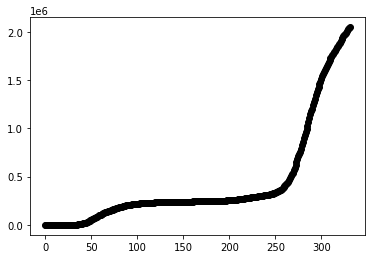

In [45]:
import matplotlib.pyplot as plt

x = np.arange(0,332)
y = (sir.IS)*italy_data['Population']
y_inverse = (1-sir.IS)*italy_data['Population']
z = italy_data['ConfirmedCases']

#First Plot, Italy original data
plt.plot(x, z, 'o', color='black');

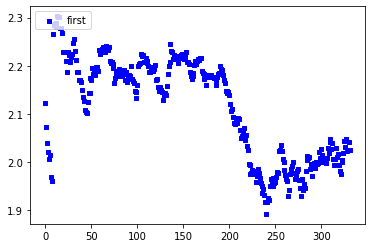

In [46]:
#Second Plot - Our Prediction so far

fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(x, y, s=10, c='b', marker="s", label='first')
#ax1.scatter(z,y, s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()

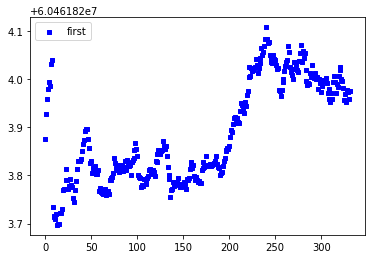

In [47]:
#Third Plot, inverting our results
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(x, y_inverse , s=10, c='b', marker="s", label='first')
#ax1.scatter(z,y, s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()